In [1]:
import nltk

In [9]:
from nltk.corpus import gutenberg
gutenberg.fileids()   # 获取语料库标识符

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [10]:
emma = gutenberg.words('austen-emma.txt')  # 获取《爱玛》语料
len(emma)

192427

In [11]:
emma = nltk.Text(emma)  # 获取单个文本检索信息对象
emma.concordance('surprize')

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [15]:
print(len(gutenberg.raw('austen-emma.txt')))  # 原文
print(gutenberg.words('austen-emma.txt'))  # 词汇集
print(gutenberg.sents('austen-emma.txt'))  # 句子

887071
['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]
[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]


In [18]:
from nltk.corpus import webtext  # 网络文本集
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:50])

firefox.txt Cookie Manager: "Don't allow sites that set remove
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Who
overheard.txt White guy: So, do you have any plans for this even
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted
singles.txt 25 SEXY MALE, seeks attrac older single lady, for 
wine.txt Lovely delicate, fragrant Rhone wine. Polished lea


In [19]:
from nltk.corpus import nps_chat  # 即时聊天回话预料库
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

In [20]:
from nltk.corpus import brown  # 布朗预料库
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [21]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [22]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [23]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

### 比较不同文体中情态动词的用法

In [27]:
from nltk.corpus import brown

news_text = brown.words(categories='news')
fdist = nltk.FreqDist([w.lower() for w in news_text])  # 统计词频
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':' + str(fdist[m]))

can:94
could:87
may:93
might:38
must:53
will:389


In [28]:
# 获取不同文体以及对应的词
cfd = nltk.ConditionalFreqDist(
    (genre, word) for genre in brown.categories()
                    for word in brown.words(categories=genre))
cfd

<ConditionalFreqDist with 15 conditions>

In [30]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
# 对指定文体的指定词计算词频
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [33]:
from nltk.corpus import reuters  # 路透社预料库
reuters.fileids()[:10]

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843']

In [36]:
reuters.categories()[:20]

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr']

In [38]:
reuters.categories(['training/9865', 'test/14826'])  # 获取指定集的类别信息

['barley', 'corn', 'grain', 'trade', 'wheat']

In [41]:
reuters.fileids(['barley', 'corn'])[:10]  # 指定类别查询语料集

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649']

In [42]:
reuters.words('training/9865')[:15]  # 开头大写的是题目

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export',
 '675']

In [44]:
reuters.words(['training/9865', 'training/9880'])[:15]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export',
 '675']

In [47]:
reuters.words(categories=['barley'])[:15]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export',
 '320']

In [49]:
from nltk.corpus import inaugural  # 就职演说预料库
inaugural.fileids()[:10]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt']

In [51]:
[fileid[:4] for fileid in inaugural.fileids()][:10]  # 获取时间

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825']

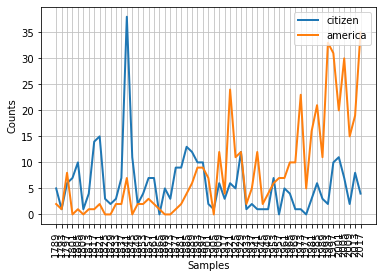

In [54]:
# 绘制不同词在随时间演讲时的变换
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4]) for fileid in inaugural.fileids()
                            for w in inaugural.words(fileid)
                                for target in ['america', 'citizen']
                                    if w.lower().startswith(target))
cfd.plot()

In [68]:
nltk.corpus.cess_esp.words()[:20]

['El',
 'grupo',
 'estatal',
 'Electricité_de_France',
 '-Fpa-',
 'EDF',
 '-Fpt-',
 'anunció',
 'hoy',
 ',',
 'jueves',
 ',',
 'la',
 'compra',
 'del',
 '51_por_ciento',
 'de',
 'la',
 'empresa',
 'mexicana']

In [56]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [57]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [59]:
nltk.corpus.udhr.fileids()[:20]  # 检索语言

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1']

In [61]:
nltk.corpus.udhr.words('Javanese-Latin1')

['PRANYATAN', 'UMUM', 'NGENANI', 'HAK', '-', 'HAK', ...]

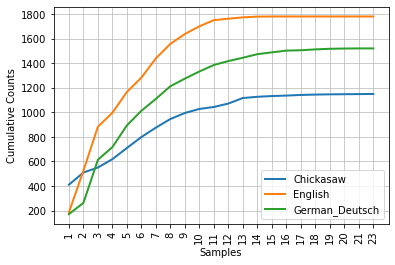

In [65]:
from nltk.corpus import udhr  # 引入世界人权宣言语料
languages = ['Chickasaw', 'English', 'German_Deutsch']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word)) for lang in languages
                        for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

In [70]:
from nltk.corpus import gutenberg  # 书籍语料
raw = gutenberg.raw('burgess-busterbrown.txt')
raw[1:20]

'The Adventures of B'

In [71]:
words = gutenberg.words('burgess-busterbrown.txt')
words[1:20]

['The',
 'Adventures',
 'of',
 'Buster',
 'Bear',
 'by',
 'Thornton',
 'W',
 '.',
 'Burgess',
 '1920',
 ']',
 'I',
 'BUSTER',
 'BEAR',
 'GOES',
 'FISHING',
 'Buster',
 'Bear']

In [76]:
sents = gutenberg.sents('burgess-busterbrown.txt')
sents[1:4]

[['I'],
 ['BUSTER', 'BEAR', 'GOES', 'FISHING'],
 ['Buster',
  'Bear',
  'yawned',
  'as',
  'he',
  'lay',
  'on',
  'his',
  'comfortable',
  'bed',
  'of',
  'leaves',
  'and',
  'watched',
  'the',
  'first',
  'early',
  'morning',
  'sunbeams',
  'creeping',
  'through',
  'the',
  'Green',
  'Forest',
  'to',
  'chase',
  'out',
  'the',
  'Black',
  'Shadows',
  '.']]

In [77]:
from nltk.corpus import PlaintextCorpusReader  # 导入自己的预料库
corpus_root = '.'
wordlists = PlaintextCorpusReader(corpus_root, ".*")
wordlists.fileids()

['.ipynb_checkpoints/获得文本语料和词汇资料-checkpoint.ipynb',
 '.ipynb_checkpoints/语言处理与Python-checkpoint.ipynb',
 'my_text.txt',
 '获得文本语料和词汇资料.ipynb',
 '语言处理与Python.ipynb']

In [80]:
wordlists.words('my_text.txt')  # 使用

['I', 'am', 'hnuer', ',', 'and', 'you', '?', 'Me', ',', ...]

In [82]:
def generate_model(cfdist, word, num=15):  # 生成随机文本
    for i in range(num):
        print(word)
        word = cfdist[word].max()
        
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)  # 相邻词对
cfd = nltk.ConditionalFreqDist(bigrams)

In [83]:
cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [84]:
generate_model(cfd, 'living')

living
creature
that
he
said
,
and
the
land
of
the
land
of
the
land


In [87]:
pairs = [('a', 'b'), ('b', 'c'), ('c', 'a'), ('c', 'd')]
cfd = nltk.ConditionalFreqDist(pairs)
cfd  # 有3个条件

<ConditionalFreqDist with 3 conditions>

In [88]:
cfd.conditions()  # 将条件按字母排序

['a', 'b', 'c']

In [90]:
cfd['c']  # 查看此条件下的频率分布

FreqDist({'a': 1, 'd': 1})

In [92]:
cfd['c']['b']  # 查看指定条件和样本的频率

0

In [95]:
cfd.tabulate()  # 为条件频率分布制表

  a b c d 
a 0 1 0 0 
b 0 0 1 0 
c 1 0 0 1 


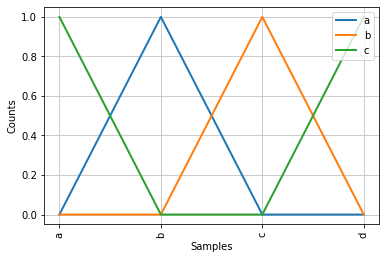

In [96]:
cfd.plot()  # 为条件频率分布绘图

In [109]:
# 过滤高频词汇
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())  # 不重复英文单词
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())  # 所有单词
    # 返回text_vocab不同于english_vocab的词
    unusual = text_vocab.difference(english_vocab)  
    return sorted(unusual)

unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:10]

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations']

In [112]:
from nltk.corpus import stopwords  # 停用词
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [113]:
# 计算非停用词比例
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    context = [w for w in text if w.lower() not in stopwords]
    return len(context) / len(text)

content_fraction(nltk.corpus.reuters.words())

0.735240435097661

In [114]:
puzzle_letters = nltk.FreqDist('egivrvonl')  # 计算词频
puzzle_letters

FreqDist({'v': 2, 'e': 1, 'g': 1, 'i': 1, 'r': 1, 'o': 1, 'n': 1, 'l': 1})

In [117]:
obligatory = 'r'
wordlist = nltk.corpus.words.words()
for w in wordlist:
    if len(w) >= 6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters:
        print(w)

<FreqDist with 6 samples and 6 outcomes>
glover
<FreqDist with 6 samples and 6 outcomes>
gorlin
<FreqDist with 6 samples and 6 outcomes>
govern
<FreqDist with 6 samples and 6 outcomes>
grovel
<FreqDist with 6 samples and 6 outcomes>
ignore
<FreqDist with 7 samples and 8 outcomes>
involver
<FreqDist with 6 samples and 6 outcomes>
lienor
<FreqDist with 6 samples and 6 outcomes>
linger
<FreqDist with 6 samples and 6 outcomes>
longer
<FreqDist with 8 samples and 8 outcomes>
lovering
<FreqDist with 6 samples and 6 outcomes>
noiler
<FreqDist with 8 samples and 8 outcomes>
overling
<FreqDist with 6 samples and 6 outcomes>
region
<FreqDist with 6 samples and 6 outcomes>
renvoi
<FreqDist with 8 samples and 9 outcomes>
revolving
<FreqDist with 6 samples and 6 outcomes>
ringle
<FreqDist with 6 samples and 6 outcomes>
roving
<FreqDist with 6 samples and 6 outcomes>
violer
<FreqDist with 6 samples and 6 outcomes>
virole


In [121]:
# 获取不大于指定词频的单词
target = 'abcde'
wordlist = nltk.corpus.words.words()
for w in wordlist:
    if nltk.FreqDist(w) <= nltk.FreqDist(target):
        print(w)

a
abed
ace
ad
ade
ae
b
ba
bac
bad
bade
bae
be
bead
bed
c
ca
cab
cad
cade
ce
d
da
dab
dace
dae
de
deb
e
ea
ecad
a
bad
be
bed


In [122]:
names = nltk.corpus.names  # 名字预料库
names.fileids()

['female.txt', 'male.txt']

In [124]:
male_names = names.words('male.txt')
male_names[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

In [133]:
entries = nltk.corpus.cmudict.entries()  # 发音语料
len(v)

133737

In [127]:
for entry in entries[:10]:
    print(entry)  # 每个词后面是声音的标签，类似音节（同一个词可能多种发音）

('a', ['AH0'])
('a.', ['EY1'])
('a', ['EY1'])
('a42128', ['EY1', 'F', 'AO1', 'R', 'T', 'UW1', 'W', 'AH1', 'N', 'T', 'UW1', 'EY1', 'T'])
('aaa', ['T', 'R', 'IH2', 'P', 'AH0', 'L', 'EY1'])
('aaberg', ['AA1', 'B', 'ER0', 'G'])
('aachen', ['AA1', 'K', 'AH0', 'N'])
('aachener', ['AA1', 'K', 'AH0', 'N', 'ER0'])
('aaker', ['AA1', 'K', 'ER0'])
('aalseth', ['AA1', 'L', 'S', 'EH0', 'TH'])


In [145]:
# 找到所有发音开头与aalseth相似的词汇
syllable = 'AA1'
[word for word, pron in entries if syllable in pron][:10]

['aaberg',
 'aachen',
 'aachener',
 'aaker',
 'aalseth',
 'aamodt',
 'aancor',
 'aardvark',
 'aaronson',
 "aaronson's"]

In [149]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

# 提取重音词，其中主重音（1）、次重音（2）和无重音（0）
[w for w, pron in entries if stress(pron) == ['0', '1', '2', '0']]

['abyssinia',
 'abyssinian',
 'aforementioned',
 'aggrandizement',
 'aggrandizing',
 'angelika',
 'chicagoans',
 'dedeurwaerder',
 'elitism',
 'enfranchises',
 'escapism',
 'gesamtmetall',
 'idealizes',
 'idealizing',
 'impregnated',
 'impregnating',
 'infiltrated',
 'infiltrating',
 'insituform',
 'inundating',
 'lanai-city',
 "martinez's",
 'nonlinear',
 'oncogenes',
 'policewoman',
 'policewomen',
 'recommited',
 'reoccupy',
 'reprogramming',
 'subcontractor',
 'torpedoing',
 'untrustworthy']

In [152]:
p3 = [(pron[0] + '-' + pron[2], word) for (word, pron) in entries
     if pron[0] == 'P' and len(pron) == 3]
p3[:10]

[('P-P', 'paap'),
 ('P-P', 'paape'),
 ('P-R', 'paar'),
 ('P-SH', 'paasch'),
 ('P-K', 'pac'),
 ('P-S', 'pace'),
 ('P-K', 'pack'),
 ('P-D', 'pad'),
 ('P-K', 'paek'),
 ('P-TH', 'paeth')]

In [161]:
cfd = nltk.ConditionalFreqDist(p3)
for template in cfd.conditions():  # 获取所有条件，如'P-TH'、'P-K'等
    if len(cfd[template]) > 0:  # 对应条件有元素
        words = cfd[template]
        wordlist = ' '.join(words)
        print(template, wordlist[:70] + ' ...')

P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop ...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour ...
P-SH paasch pash pesch pesh posch posh pusch push ...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk  ...
P-S puss pace pass pasts peace pearse pease perce pers perse pesce piece p ...
P-D pad paid pawed peed pied pod poohed ...
P-TH paeth path pathe perth peth pith poth puth ...
P-F paff poff poof puff ...
P-JH page paige podge purge ...
P-L pall pahl pail paille pal pale paul paule paull peal peale pearl pearl ...
P-IY0 pai ...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn ...
P-Z pais paiz pao's pas pause paws pays paz peas pease pei's perz pez pies ...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett ...
P-M palm palme pam pimm pom pymm ...
P-NG pang peng ping pong pung ...
P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit

In [164]:
# 获取发音词典（若无则可以手动添加，但是对NLTK预料库不影响）
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [165]:
from nltk.corpus import swadesh  # 比较词表，多种语言都含200左右常用词
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [167]:
swadesh.words('en')[:10]

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there']

In [169]:
fr2en = swadesh.entries(['fr', 'en'])  # 不同语言的同源词
fr2en[:10]

[('je', 'I'),
 ('tu, vous', 'you (singular), thou'),
 ('il', 'he'),
 ('nous', 'we'),
 ('vous', 'you (plural)'),
 ('ils, elles', 'they'),
 ('ceci', 'this'),
 ('cela', 'that'),
 ('ici', 'here'),
 ('là', 'there')]

In [170]:
translate = dict(fr2en)  # 翻译 fr -> en
translate['chien']

'dog'

In [171]:
# 更新翻译词典
de2en = swadesh.entries(['de', 'en'])
translate.update(dict(de2en))  # 加入德语
translate['Hund']

'dog'

In [174]:
from nltk.corpus import wordnet as wn  
wn.synsets('motorcar')  # 查找'motorcar'的同义词集

[Synset('car.n.01')]

In [176]:
wn.synset('car.n.01').lemma_names()  # 查看同义词

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [178]:
wn.synset('car.n.01').definition()  # 定义

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [180]:
wn.synset('car.n.01').examples()  # 例句

['he needs a car to get to work']

In [182]:
wn.synset('car.n.01').lemmas()  # 同义词集的所有词条

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [183]:
wn.lemma('car.n.01.automobile')  # 查找特定的词条

Lemma('car.n.01.automobile')

In [185]:
wn.lemma('car.n.01.automobile').synset()  # 得到词条的对应同义词集

Synset('car.n.01')

In [186]:
wn.lemma('car.n.01.automobile').name()  # 得到词条的"名字"

'automobile'

In [187]:
wn.synsets('car')  # 与'motorcar'不同，有5个词集

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [188]:
for synset in wn.synsets('car'):  # 查看每个同义词集的同义词
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [189]:
wn.lemmas('car')  # 查看包含'car'的所有词条

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

In [191]:
motorcar = wn.synset('car.n.01')
type_of_motorcar = motorcar.hyponyms()  # 下位词（包含的词集）
type_of_motorcar

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

In [192]:
motorcar.hypernyms()  # 上位词（父词集）

[Synset('motor_vehicle.n.01')]

In [197]:
paths = motorcar.hypernym_paths()
len(paths), paths

(2,
 [[Synset('entity.n.01'),
   Synset('physical_entity.n.01'),
   Synset('object.n.01'),
   Synset('whole.n.02'),
   Synset('artifact.n.01'),
   Synset('instrumentality.n.03'),
   Synset('container.n.01'),
   Synset('wheeled_vehicle.n.01'),
   Synset('self-propelled_vehicle.n.01'),
   Synset('motor_vehicle.n.01'),
   Synset('car.n.01')],
  [Synset('entity.n.01'),
   Synset('physical_entity.n.01'),
   Synset('object.n.01'),
   Synset('whole.n.02'),
   Synset('artifact.n.01'),
   Synset('instrumentality.n.03'),
   Synset('conveyance.n.03'),
   Synset('vehicle.n.01'),
   Synset('wheeled_vehicle.n.01'),
   Synset('self-propelled_vehicle.n.01'),
   Synset('motor_vehicle.n.01'),
   Synset('car.n.01')]])

In [198]:
motorcar.root_hypernyms()  # 根上位词

[Synset('entity.n.01')]

In [2]:
from nltk.corpus import wordnet as wn

In [3]:
wn.synset('tree.n.01').part_meronyms()  # 包含的部分

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [4]:
wn.synset('tree.n.01').substance_meronyms()  # 其实质

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [5]:
wn.synset('tree.n.01').member_holonyms()  # 组成的整体

[Synset('forest.n.01')]

In [16]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name(), ':', synset.definition())

batch.n.02 : (often followed by `of') a large number or amount or extent
mint.n.02 : any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03 : any member of the mint family of plants
mint.n.04 : the leaves of a mint plant used fresh or candied
mint.n.05 : a candy that is flavored with a mint oil
mint.n.06 : a plant where money is coined by authority of the government


In [17]:
wn.synset('mint.n.04').part_holonyms()  # 叶子是薄荷的一部分

[Synset('mint.n.02')]

In [18]:
wn.synset('mint.n.04').substance_holonyms()  # 用薄荷油制作的糖材质是薄荷

[Synset('mint.n.05')]

In [19]:
wn.synset('walk.v.01').entailments()  # 走路的"需求"包括抬脚

[Synset('step.v.01')]

In [20]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [21]:
wn.lemma('supply.n.02.supply').antonyms()  # "供给"的反义词是"需求"

[Lemma('demand.n.02.demand')]

In [24]:
dir(wn.synset('harmony.n.02'))[-20:]  # 查看指定词集的所有方法

['member_meronyms',
 'min_depth',
 'name',
 'offset',
 'part_holonyms',
 'part_meronyms',
 'path_similarity',
 'pos',
 'region_domains',
 'res_similarity',
 'root_hypernyms',
 'shortest_path_distance',
 'similar_tos',
 'substance_holonyms',
 'substance_meronyms',
 'topic_domains',
 'tree',
 'usage_domains',
 'verb_groups',
 'wup_similarity']

# 语义相似度

In [25]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

right.lowest_common_hypernyms(minke)  # 语义最相近的

[Synset('baleen_whale.n.01')]

In [26]:
wn.synset('baleen_whale.n.01').min_depth()  # 同义词集深度

14

In [27]:
wn.synset('whale.n.02').min_depth()

13

In [28]:
wn.synset('entity.n.01').min_depth()

0

In [29]:
right.path_similarity(minke)  # 求取相似度

0.25

In [30]:
right.path_similarity(tortoise)

0.07692307692307693

In [31]:
help(wn)

Help on WordNetCorpusReader in module nltk.corpus.reader.wordnet object:

class WordNetCorpusReader(nltk.corpus.reader.api.CorpusReader)
 |  WordNetCorpusReader(root, omw_reader)
 |  
 |  A corpus reader used to access wordnet or its variants.
 |  
 |  Method resolution order:
 |      WordNetCorpusReader
 |      nltk.corpus.reader.api.CorpusReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, root, omw_reader)
 |      Construct a new wordnet corpus reader, with the given root
 |      directory.
 |  
 |  all_lemma_names(self, pos=None, lang='eng')
 |      Return all lemma names for all synsets for the given
 |      part of speech tag and language or languages. If pos is
 |      not specified, all synsets for all parts of speech will
 |      be used.
 |  
 |  all_synsets(self, pos=None)
 |      Iterate over all synsets with a given part of speech tag.
 |      If no pos is specified, all synsets for all parts of speech
 |      will be loaded.
 |  
 |  cita